![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# BONUS - Beers
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import numpy as np
import pandas as pd


## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [2]:
# 1.
df = pd.read_csv("../data/datasets_beers.csv")


# 2.
print(df.columns)



Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')


In [3]:
df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
df.shape

(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [5]:
df.drop(columns = ["Unnamed: 0"], inplace = True)

## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [6]:
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 5
¿De qué tipo son los datos?

In [7]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [8]:
df2 =df.drop(columns = ["name","style"])
df2.aggregate([np.min,np.mean,np.max])

,abv,ibu,id,brewery_id,ounces
amin,0.001000,4.000000,1.000000,0.000000,8.400000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
amax,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [9]:
df.groupby("style")["id"].count()

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: id, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [14]:
subdf = df.iloc[10:21,:]
subdf.loc[:,"name":"ounces"]
subarray = subdf.loc[:,["abv", "ibu", "ounces"]]
A = np.array(subarray)
A

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [15]:
df.ounces.count()

2410

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [17]:
print(df.ibu.mean())
print(df.ibu.max())
print(df.ibu.min())

42.71316725978647
138.0
4.0


In [28]:
df.groupby("ibu")["name"].max()


ibu
4.0      Summer Solstice Cerveza Crema (2009)
5.0                        Yo Soy Un Berliner
6.0                           Winter Solstice
7.0                   Samuel Adams Summer Ale
8.0                              Porch Rocker
                         ...                 
120.0                            Heady Topper
126.0         Bay of Bengal Double IPA (2014)
130.0                           Dead-Eye DIPA
135.0                      Troopers Alley IPA
138.0               Bitter Bitch Imperial IPA
Name: name, Length: 107, dtype: object

In [34]:
df.groupby("ibu")["name"].min()

ibu
4.0                      Summer Solstice
5.0                18th Anniversary Gose
6.0                         Mr. Blue Sky
7.0                      O'Fallon Wheach
8.0                            Ale Cider
                      ...               
120.0                       Abrasive Ale
126.0    Bay of Bengal Double IPA (2014)
130.0                      Dead-Eye DIPA
135.0                 Troopers Alley IPA
138.0          Bitter Bitch Imperial IPA
Name: name, Length: 107, dtype: object

In [33]:
df.loc[:,["ibu", "name"]].sort_values(by ="ibu", ascending = False)

,ibu,name
147,138.0,Bitter Bitch Imperial IPA
2390,135.0,Troopers Alley IPA
525,130.0,Dead-Eye DIPA
594,126.0,Bay of Bengal Double IPA (2014)
2145,120.0,Heady Topper
...,...,...
2403,NaN,Wynkoop Pumpkin Ale
2404,NaN,Rocky Mountain Oyster Stout
2406,NaN,Rail Yard Ale
2407,NaN,B3K Black Lager


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [35]:
df.ibu.mean()

42.71316725978647

In [36]:
df.ibu.std()


25.954065911259324

In [37]:
df.ibu.median()

35.0

In [39]:
df.ibu.max()

138.0

In [41]:
df.ibu.min()

4.0

## Ejercicio 12
¿Existe alguna [relación lineal](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico.

Hint: La librería **Seaborn** tiene un método llamado `heatmap` que te puede ayudar. 



In [55]:
df.corr(method='pearson', min_periods=1)
D= df.corr()


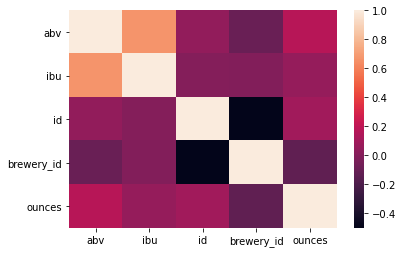

In [56]:
import seaborn as sns
S = sns.heatmap(D)

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un [histograma](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html). ¿Se trata de una distribución simétrica o asimétrica?

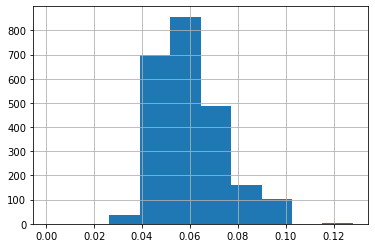

In [58]:
df.abv.hist()

## Ejercicio 14
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [68]:
df.loc[:,["style","abv"]].sort_values(by="abv", ascending = False)

,style,abv
2278,Quadrupel (Quad),0.128
70,English Barleywine,0.125
2189,Russian Imperial Stout,0.120
2279,Rye Beer,0.104
1857,Baltic Porter,0.100
...,...,...
2186,American Dark Wheat Ale,NaN
2337,American IPA,NaN
2345,American Pale Lager,NaN
2347,English Stout,NaN


In [69]:
df.loc[:,["style","ibu"]].sort_values(by="ibu", ascending = False)

,style,ibu
147,American Double / Imperial IPA,138.0
2390,American IPA,135.0
525,American Double / Imperial IPA,130.0
594,American Double / Imperial IPA,126.0
2145,American Double / Imperial IPA,120.0
...,...,...
2403,Pumpkin Ale,NaN
2404,American Stout,NaN
2406,American Amber / Red Ale,NaN
2407,Schwarzbier,NaN


## Ejercicio 15
Carga el datasets de cervecerias `datasets_breweries.csv`

In [72]:
dataset2 = pd.read_csv("../data/datasets_breweries.csv")
dataset2

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 16
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [77]:
dataset2.rename(columns = {"Unnamed: 0":"brewery_id","name":"brewery_name"}, inplace = True)

## Ejercicio 17
Junta los dos datasets que tienes

In [79]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [80]:
dataset2.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [81]:
D = pd.concat([df, dataset2])

## Ejercicio 18
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [91]:
a = dataset2["state"].unique()
states = len(a)
print(states)
b = dataset2["city"].unique()
cities = len(b)
print(cities)
c = dataset2["brewery_name"].unique()
cerveceria = len(c)
print(cerveceria)

51
384
551


## Ejercicio 19
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [95]:
D.groupby(["state","city"])["abv"].aggregate(np.median, np.max)

TypeError: 'function' object is not iterable

In [ ]:
df_method.groupby("key").aggregate({"data1": np.prod, "data2": [np.median, min]})

## Ejercicio 20
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

## Ejercicio 21
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

## Ejercicio 22
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

## Ejercicio 23
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media